# Fraud detection

## Problem statement

Whether this credit-card is fraudulent or not.

## Dataset
[https://www.kaggle.com/datasets/yashpaloswal/fraud-detection-credit-card](https://www.kaggle.com/datasets/yashpaloswal/fraud-detection-credit-card)

## 1. Importing Libraries

In [1]:
import numpy as np  
import pandas as pd  

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Loading the dataset

In [2]:
train = './creditcard.csv'
df_train = pd.read_csv(train)

## 3. Exploratory data analysis

In [3]:
# View the first five lines
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df_train.shape

(284807, 31)

In [5]:
# checking data information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Interpreting Data Information**

- We have 284807 rows, any column that contains lesser number of rows has missing values.
- We have 31 columns.
- There are numerical features that have data type float64.
- There are numerical features that have data type int64.

No missing columns.

**putting all column names in lowercase**

In [6]:
df_train.columns = df_train.columns.str.lower()
df_train

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
# statistical summary of numerical variables
df_train.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Univariate Analysis

**Analyze the target variable**


In [8]:
# checking for missing values
df_train['class'].isnull().sum()

0

In [9]:
# number of unique values
df_train['class'].nunique()

2

In [10]:
# frequency distribution
df_train['class'].value_counts()

0    284315
1       492
Name: class, dtype: int64

In [11]:
# Percent breakdown of target (ratio of frequency distribution of values)
df_train['class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: class, dtype: float64

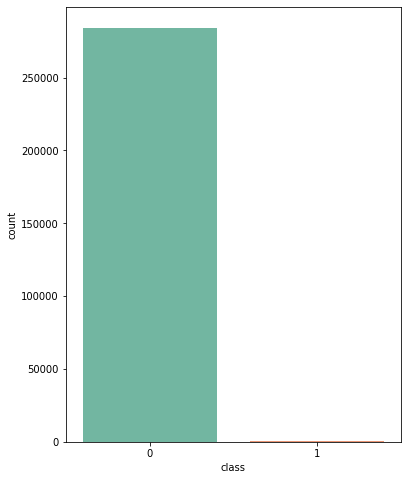

In [12]:
# visualizing the frequency distribution
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="class", data=df_train, palette="Set2")
plt.show()

In [13]:
# Examining how many cards are fraudulent
print(sum(df_train['class']),'cards out of',len(df_train))

492 cards out of 284807


### Bivariate Analysis


In [14]:
compare_class_amount = df_train[['amount', 'class']]
compare_class_amount

,amount,class
0,149.62,0
1,2.69,0
2,378.66,0
3,123.50,0
4,69.99,0
...,...,...
284802,0.77,0
284803,24.79,0
284804,67.88,0
284805,10.00,0


In [15]:
compare_class_amount[compare_class_amount["class"] == 1]

,amount,class
541,0.00,1
623,529.00,1
4920,239.93,1
6108,59.00,1
6329,1.00,1
...,...,...
279863,390.00,1
280143,0.76,1
280149,77.89,1
281144,245.00,1


In [16]:
compare_class_amount["amount"].mean()

88.34961925093133

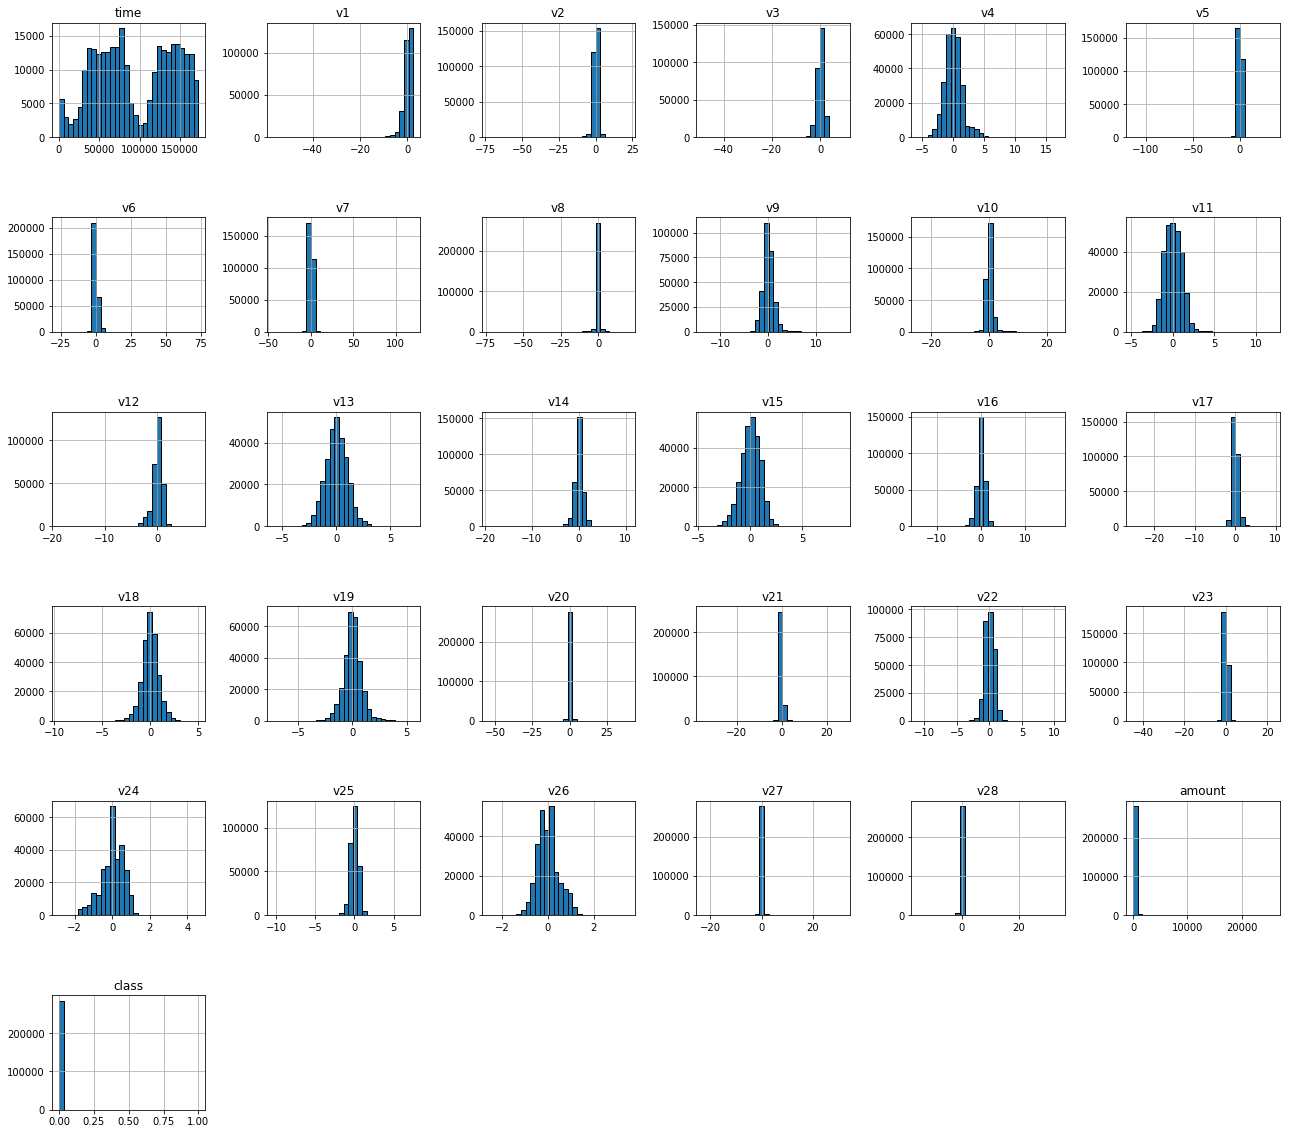

In [17]:
# distribution 
df_train.hist(figsize=(22, 20), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [18]:
# correlations
corr_matrix = df_train.corr()
corr_matrix

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
v1,0.117396,1.000000e+00,3.777823e-12,-2.118614e-12,-1.733159e-13,-3.473231e-12,-1.306165e-13,-1.116494e-13,2.114527e-12,3.016285e-14,...,-3.276238e-12,2.281863e-12,-2.969746e-12,-1.029876e-12,1.144179e-12,1.835263e-12,7.624804e-12,-9.769215e-13,-0.227709,-0.101347
v2,-0.010593,3.777823e-12,1.000000e+00,2.325661e-12,-2.314981e-12,-1.831952e-12,9.438444e-13,5.403436e-12,2.133785e-14,3.238513e-13,...,2.280202e-12,-2.548560e-13,-4.856120e-12,6.431308e-13,-9.423730e-13,-4.129100e-13,-9.856545e-13,2.525513e-12,-0.531409,0.091289
v3,-0.419618,-2.118614e-12,2.325661e-12,1.000000e+00,2.046235e-13,-4.032993e-12,-1.574471e-13,3.405586e-12,-1.272385e-12,-6.812351e-13,...,6.736294e-13,-8.909339e-13,4.147209e-12,3.407636e-12,5.712956e-13,-2.577274e-12,-5.041444e-12,5.189109e-12,-0.210880,-0.192961
v4,-0.105260,-1.733159e-13,-2.314981e-12,2.046235e-13,1.000000e+00,-2.552389e-13,1.084041e-12,8.135064e-13,7.334818e-13,-7.143069e-13,...,-2.696370e-12,4.347776e-13,-4.160969e-12,-2.368743e-12,1.619944e-12,-3.043100e-13,-1.456066e-12,-2.832372e-12,0.098732,0.133447
v5,0.173072,-3.473231e-12,-1.831952e-12,-4.032993e-12,-2.552389e-13,1.000000e+00,-6.934789e-14,1.573956e-11,-2.038243e-12,-1.000756e-12,...,-1.751796e-12,7.095269e-13,3.616075e-12,-2.808776e-13,1.451126e-12,-1.896141e-13,-2.124559e-12,1.010196e-11,-0.386356,-0.094974
v6,-0.063016,-1.306165e-13,9.438444e-13,-1.574471e-13,1.084041e-12,-6.934789e-14,1.000000e+00,-2.798968e-12,-5.446480e-13,2.036743e-12,...,1.476858e-12,-1.144797e-12,-1.527842e-12,1.551854e-12,-2.723707e-12,3.351239e-12,1.481307e-12,-6.069227e-13,0.215981,-0.043643
v7,0.084714,-1.116494e-13,5.403436e-12,3.405586e-12,8.135064e-13,1.573956e-11,-2.798968e-12,1.000000e+00,5.528803e-12,5.088082e-13,...,2.788246e-12,-8.133209e-13,-4.293094e-12,-2.553518e-12,-7.406970e-13,-4.476467e-12,-1.328637e-11,2.958679e-13,0.397311,-0.187257
v8,-0.036949,2.114527e-12,2.133785e-14,-1.272385e-12,7.334818e-13,-2.038243e-12,-5.446480e-13,5.528803e-12,1.000000e+00,-2.243172e-12,...,-4.022440e-12,-2.679560e-12,9.013064e-13,-1.074365e-12,-3.268979e-12,1.043839e-12,-3.499804e-12,1.866598e-12,-0.103079,0.019875
v9,-0.008660,3.016285e-14,3.238513e-13,-6.812351e-13,-7.143069e-13,-1.000756e-12,2.036743e-12,5.088082e-13,-2.243172e-12,1.000000e+00,...,3.040326e-12,-7.467526e-13,-1.011003e-12,8.579072e-13,-1.590341e-12,-7.723547e-13,2.428930e-12,-1.406856e-12,-0.044246,-0.097733


In [19]:
# order the correlations with class
correlations = corr_matrix["class"].sort_values()
correlations

v17      -0.326481
v14      -0.302544
v12      -0.260593
v10      -0.216883
v16      -0.196539
v3       -0.192961
v7       -0.187257
v18      -0.111485
v1       -0.101347
v9       -0.097733
v5       -0.094974
v6       -0.043643
time     -0.012323
v24      -0.007221
v13      -0.004570
v15      -0.004223
v23      -0.002685
v22       0.000805
v25       0.003308
v26       0.004455
amount    0.005632
v28       0.009536
v27       0.017580
v8        0.019875
v20       0.020090
v19       0.034783
v21       0.040413
v2        0.091289
v4        0.133447
v11       0.154876
class     1.000000
Name: class, dtype: float64

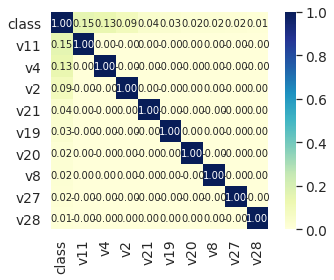

In [20]:
# check correlation matrix, darker means more correlation 
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'class')['class'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',  cmap="YlGnBu", annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Check outliers

#### Numerical Variables Analysis

In [22]:
# isolating numerical columns in a dataframe
numerics = ['int64', 'float64']
num_df = df_train.select_dtypes(include=numerics)
num_df.head().T

,0,1,2,3,4
time,0.000000,0.000000,1.000000,1.000000,2.000000
v1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
v2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
v3,2.536347,0.166480,1.773209,1.792993,1.548718
v4,1.378155,0.448154,0.379780,-0.863291,0.403034
v5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
v6,0.462388,-0.082361,1.800499,1.247203,0.095921
v7,0.239599,-0.078803,0.791461,0.237609,0.592941
v8,0.098698,0.085102,0.247676,0.377436,-0.270533
v9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [23]:
# summary statistics of all the columns
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
v1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
v2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
v3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
v4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
v5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
v6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
v7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
v8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
v9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


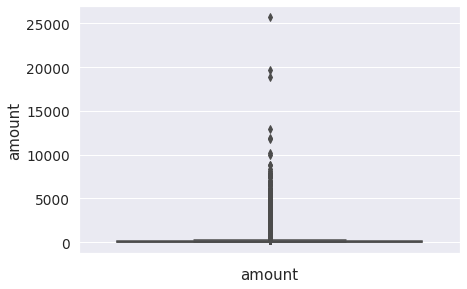

In [24]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
ax = sns.boxplot(y=df_train["amount"])
ax.set_xlabel("amount")
sns.set(style="darkgrid")

In [25]:
# calculating outlier space for amount

IQR = df_train["amount"].quantile(0.75) - df_train["amount"].quantile(0.25)
lf = df_train["amount"].quantile(0.25) - (IQR * 3)
uf = df_train["amount"].quantile(0.75) + (IQR * 3)
print('Outliers for the amount are < {lbound} or > {ubound}'.format(
    lbound=lf, 
    ubound=uf)
     )

Outliers for the amount are < -209.095 or > 291.86


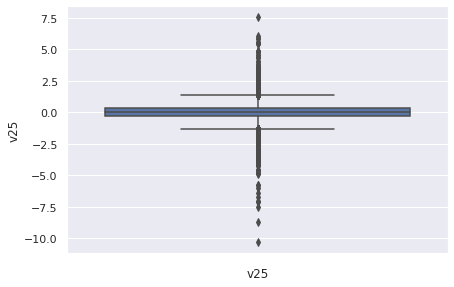

In [26]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
ax = sns.boxplot(y=df_train["v25"])
ax.set_xlabel("v25")
sns.set(style="darkgrid")

In [27]:
# calculating outlier space for V25

IQR = df_train["v25"].quantile(0.75) - df_train["v25"].quantile(0.25)
lf = df_train["v25"].quantile(0.25) - (IQR * 3)
uf = df_train["v25"].quantile(0.75) + (IQR * 3)

print('Outliers for the v25 are < {lbound} or > {ubound}'.format(
    lbound=lf, 
    ubound=uf)
     )

Outliers for the v25 are < -2.3207269050000003 or > 2.3542974140000004


## Baseline model

In [28]:
base = ['amount', 'v13', 'v14', 'v15', 'v16', 'v27']

In [29]:
# isolate the target and filter the features we want to use
def baseline_model(X):
    target = X["class"]
    X = X[base]
    return X, target

In [30]:
X, y = baseline_model(df_train.copy())

In [31]:
X.head()

,amount,v13,v14,v15,v16,v27
0,149.62,-0.991390,-0.311169,1.468177,-0.470401,0.133558
1,2.69,0.489095,-0.143772,0.635558,0.463917,-0.008983
2,378.66,0.717293,-0.165946,2.345865,-2.890083,-0.055353
3,123.50,0.507757,-0.287924,-0.631418,-1.059647,0.062723
4,69.99,1.345852,-1.119670,0.175121,-0.451449,0.219422


In [32]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X, y)

LogisticRegression(max_iter=1000)

In [33]:
# Make prediction

lr_base_predicted_labels = lr_model.predict(X)

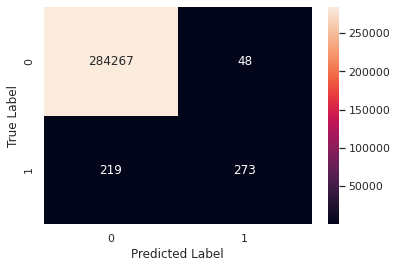

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.85      0.55      0.67       492

    accuracy                           1.00    284807
   macro avg       0.92      0.78      0.84    284807
weighted avg       1.00      1.00      1.00    284807



In [34]:
# Plotting the Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y, lr_base_predicted_labels)
cmdf = pd.DataFrame(cm, index=["0","1"],columns=["0","1"])

fig, ax = plt.subplots(1,1)

sns.heatmap(cmdf,annot=True, fmt='d', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

#Printing the Classification Report

print(classification_report(y, lr_base_predicted_labels))

## Feature engineering

### Feature scaling

In [35]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
v1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
v2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
v3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
v4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
v5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
v6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
v7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
v8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
v9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pd.DataFrame(  # mean of 0 and std of 1 but ranges are different (see min and max)
    StandardScaler().fit_transform(df_train),
).describe().T

,count,mean,std,min,25%,50%,75%,max
0,284807.0,-3.065637e-16,1.000002,-1.996583,-0.855212,-0.213145,0.937217,1.642058
1,284807.0,2.594615e-18,1.000002,-28.798555,-0.469892,0.009245,0.671694,1.253351
2,284807.0,-3.991715e-18,1.000002,-44.035292,-0.362471,0.039657,0.486720,13.357750
3,284807.0,-7.025418e-17,1.000002,-31.871733,-0.587214,0.118612,0.677457,6.187993
4,284807.0,-3.991715e-18,1.000002,-4.013919,-0.599379,-0.014017,0.525008,11.918743
5,284807.0,3.033703e-17,1.000002,-82.408097,-0.501069,-0.039367,0.443346,25.214135
6,284807.0,1.197515e-18,1.000002,-19.636058,-0.576682,-0.205805,0.299163,55.020149
7,284807.0,5.189230e-18,1.000002,-35.209396,-0.447886,0.032417,0.461111,97.478239
8,284807.0,-4.291094e-18,1.000002,-61.302524,-0.174680,0.018720,0.274078,16.751534
9,284807.0,-2.020806e-18,1.000002,-12.228015,-0.585363,-0.046812,0.543531,14.194945


In [37]:
pd.DataFrame(  # mean and std are different but min and max are 0s and 1s
    MinMaxScaler().fit_transform(df_train),
).describe().T

,count,mean,std,min,25%,50%,75%,max
0,284807.0,0.548717,0.274828,0.0,0.313681,0.490138,0.806290,1.0
1,284807.0,0.958294,0.033276,0.0,0.942658,0.958601,0.980645,1.0
2,284807.0,0.767258,0.017424,0.0,0.760943,0.767949,0.775739,1.0
3,284807.0,0.837414,0.026275,0.0,0.821985,0.840530,0.855213,1.0
4,284807.0,0.251930,0.062764,0.0,0.214311,0.251050,0.284882,1.0
5,284807.0,0.765716,0.009292,0.0,0.761060,0.765351,0.769836,1.0
6,284807.0,0.263020,0.013395,0.0,0.255295,0.260263,0.267027,1.0
7,284807.0,0.265356,0.007537,0.0,0.261980,0.265600,0.268831,1.0
8,284807.0,0.785385,0.012812,0.0,0.783148,0.785625,0.788897,1.0
9,284807.0,0.462780,0.037846,0.0,0.440626,0.461008,0.483350,1.0


**Update the model with the other features**

In [38]:
# save dataset
df_train.to_csv('preprocessed_data.csv', index=None)

In [39]:
new_data = pd.read_csv('./preprocessed_data.csv')

In [40]:
def update_model(X):
    target = X["class"]
    X = X.drop(["class"], axis=1)
    return X, target

In [41]:
X, y = update_model(new_data.copy())

In [42]:
lr_model.fit(X, y)

LogisticRegression(max_iter=1000)

In [44]:
# Make prediction

lr_base_updated_predicted_labels = lr_model.predict(X)

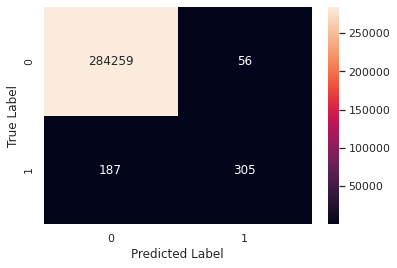

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.85      0.55      0.67       492

    accuracy                           1.00    284807
   macro avg       0.92      0.78      0.84    284807
weighted avg       1.00      1.00      1.00    284807



In [45]:
# Plotting the Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y, lr_base_updated_predicted_labels)
cmdf = pd.DataFrame(cm, index=["0","1"],columns=["0","1"])
fig, ax = plt.subplots(1,1)
sns.heatmap(cmdf,annot=True, fmt='d', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

#Printing the Classification Report
print(classification_report(y, lr_base_predicted_labels))

**Weight of variables**

In [46]:
feature_names = lr_model.feature_names_in_
feature_names

array(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9',
       'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18',
       'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27',
       'v28', 'amount'], dtype=object)

In [47]:
coefficients = pd.DataFrame(
    lr_model.coef_[0],
    columns=["Coefficients"],
    index=feature_names,
)

coefficients.sort_values(by=['Coefficients'])

,Coefficients
v3,-1.167256
v15,-0.897130
v25,-0.833816
v14,-0.793581
v11,-0.606635
v9,-0.602953
v17,-0.515965
v13,-0.505511
v8,-0.476484
v2,-0.449773


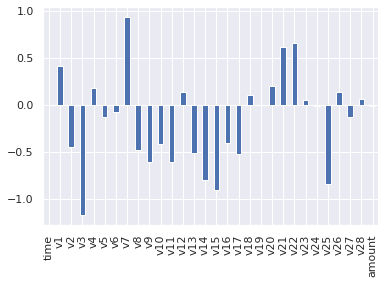

In [48]:
axes = coefficients['Coefficients'].plot.bar()

In [49]:
# bias
lr_model.intercept_[0]

-3.295466040646744

## 5. Training other models


**Algorithms to use**
- Decision tree
- Naive Bayes
- Support vector machine (SVM)
- Random Forest
- Gradient Boosting

In [50]:
# split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1) # 60/40

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.5, random_state=1) # 20/20

In [51]:
# Fit again Logistic regression with the split data
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [53]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [55]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

## 6. Evaluating models

In [58]:
# Make prediction on validation data

lr_predicted_labels = lr_model.predict(X_val)
dt_predicted_labels = dt_model.predict(X_val)
nb_predicted_labels = dt_model.predict(X_val)
svm_predicted_labels = svm_model.predict(X_val)
rf_predicted_labels = rf_model.predict(X_val)
gb_predicted_labels = gb_model.predict(X_val)

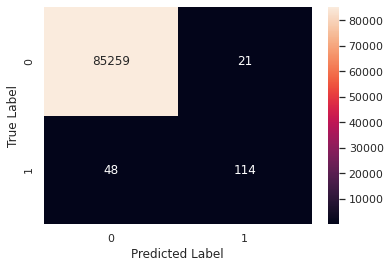

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85280
           1       0.84      0.70      0.77       162

    accuracy                           1.00     85442
   macro avg       0.92      0.85      0.88     85442
weighted avg       1.00      1.00      1.00     85442



In [59]:
# Plotting the Confusion Matrix for logistic reg

cm = confusion_matrix(y_val, lr_predicted_labels)
cmdf = pd.DataFrame(cm, index=["0","1"],columns=["0","1"])
fig, ax = plt.subplots(1,1)
sns.heatmap(cmdf,annot=True, fmt='d', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

#Printing the Classification Report
print(classification_report(y_val, lr_predicted_labels))

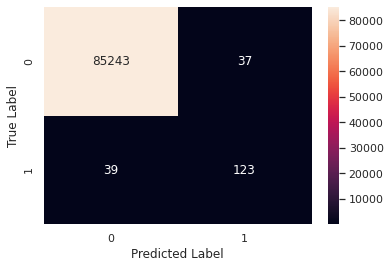

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85280
           1       0.77      0.76      0.76       162

    accuracy                           1.00     85442
   macro avg       0.88      0.88      0.88     85442
weighted avg       1.00      1.00      1.00     85442



In [60]:
# Plotting the Confusion Matrix for decision tree

cm = confusion_matrix(y_val, dt_predicted_labels)
cmdf = pd.DataFrame(cm, index=["0","1"],columns=["0","1"])
fig, ax = plt.subplots(1,1)
sns.heatmap(cmdf,annot=True, fmt='d', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

#Printing the Classification Report
print(classification_report(y_val, dt_predicted_labels))

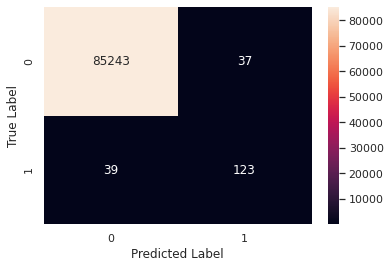

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85280
           1       0.77      0.76      0.76       162

    accuracy                           1.00     85442
   macro avg       0.88      0.88      0.88     85442
weighted avg       1.00      1.00      1.00     85442



In [61]:
# Plotting the Confusion Matrix for Naive Bayes

cm = confusion_matrix(y_val, nb_predicted_labels)
cmdf = pd.DataFrame(cm, index=["0","1"],columns=["0","1"])
fig, ax = plt.subplots(1,1)
sns.heatmap(cmdf,annot=True, fmt='d', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

#Printing the Classification Report
print(classification_report(y_val, nb_predicted_labels))

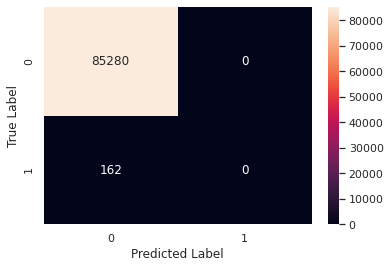

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85280
           1       0.00      0.00      0.00       162

    accuracy                           1.00     85442
   macro avg       0.50      0.50      0.50     85442
weighted avg       1.00      1.00      1.00     85442



/home/assitan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/assitan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/assitan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
# Plotting the Confusion Matrix for SVM

cm = confusion_matrix(y_val, svm_predicted_labels)
cmdf = pd.DataFrame(cm, index=["0","1"],columns=["0","1"])
fig, ax = plt.subplots(1,1)
sns.heatmap(cmdf,annot=True, fmt='d', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

#Printing the Classification Report
print(classification_report(y_val, svm_predicted_labels))

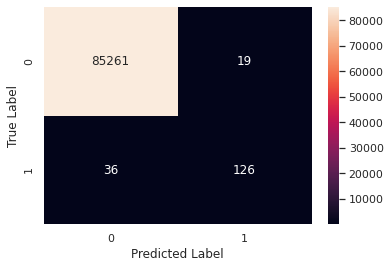

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85280
           1       0.87      0.78      0.82       162

    accuracy                           1.00     85442
   macro avg       0.93      0.89      0.91     85442
weighted avg       1.00      1.00      1.00     85442



In [63]:
# Plotting the Confusion Matrix for Random forest

cm = confusion_matrix(y_val, rf_predicted_labels)
cmdf = pd.DataFrame(cm, index=["0","1"],columns=["0","1"])
fig, ax = plt.subplots(1,1)
sns.heatmap(cmdf,annot=True, fmt='d', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

#Printing the Classification Report
print(classification_report(y_val, rf_predicted_labels))

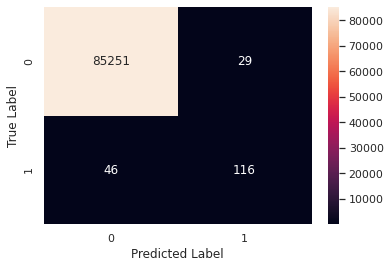

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85280
           1       0.80      0.72      0.76       162

    accuracy                           1.00     85442
   macro avg       0.90      0.86      0.88     85442
weighted avg       1.00      1.00      1.00     85442



In [64]:
# Plotting the Confusion Matrix for Gradient Boosting

cm = confusion_matrix(y_val, gb_predicted_labels)
cmdf = pd.DataFrame(cm, index=["0","1"],columns=["0","1"])
fig, ax = plt.subplots(1,1)
sns.heatmap(cmdf,annot=True, fmt='d', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

#Printing the Classification Report
print(classification_report(y_val, gb_predicted_labels))

In [67]:
from sklearn.metrics import f1_score

print("F1-scores of the models:")

print("Logistic regression:", f1_score(y_val, lr_predicted_labels))
print("Decision tree:", f1_score(y_val, dt_predicted_labels))
print("Naive Bayes:", f1_score(y_val, nb_predicted_labels))
print("Support Vector Machine:", f1_score(y_val, svm_predicted_labels))
print("Random Forest:", f1_score(y_val, rf_predicted_labels))
print("Gradient boosting:", f1_score(y_val, gb_predicted_labels))

F1-scores of the models:
Logistic regression: 0.7676767676767676
Decision tree: 0.7639751552795032
Naive Bayes: 0.7639751552795032
Support Vector Machine: 0.0
Random Forest: 0.8208469055374594
Gradient boosting: 0.7557003257328991


## Hyperparameter tuning

In [68]:
lr_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'solver' : ['liblinear','lbfgs'],#saga
          'max_iter': [5000]}

In [69]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_lr = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=lr_grid,
                                 cv=3,
                                verbose=2)

rs_lr.fit(X_train, y_train);

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..................C=10, max_iter=5000, solver=lbfgs; total time=   6.3s
[CV] END ..................C=10, max_iter=5000, solver=lbfgs; total time=   5.9s
[CV] END ..................C=10, max_iter=5000, solver=lbfgs; total time=   4.3s
[CV] END .................C=100, max_iter=5000, solver=lbfgs; total time=   4.9s
[CV] END .................C=100, max_iter=5000, solver=lbfgs; total time=   2.7s
[CV] END .................C=100, max_iter=5000, solver=lbfgs; total time=   2.0s
[CV] END ...........C=0.001, max_iter=5000, solver=liblinear; total time=   0.7s
[CV] END ...........C=0.001, max_iter=5000, solver=liblinear; total time=   0.7s
[CV] END ...........C=0.001, max_iter=5000, solver=liblinear; total time=   0.7s
[CV] END ............C=1000, max_iter=5000, solver=liblinear; total time=   0.7s
[CV] END ............C=1000, max_iter=5000, solver=liblinear; total time=   0.8s
[CV] END ............C=1000, max_iter=5000, solv

In [70]:
# Find the best parameters
rs_lr.best_estimator_

LogisticRegression(C=1000, max_iter=5000)

In [71]:
# Evaluate the randomized search logistic regression model
rs_lr_predicted_labels = rs_lr.predict(X_val)

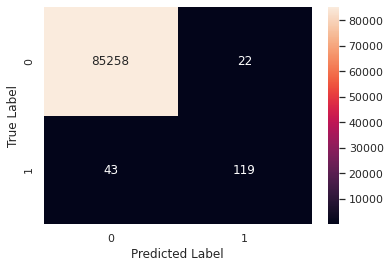

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85280
           1       0.84      0.73      0.79       162

    accuracy                           1.00     85442
   macro avg       0.92      0.87      0.89     85442
weighted avg       1.00      1.00      1.00     85442



In [73]:
# Plotting the Confusion Matrix

cm = confusion_matrix(y_val, rs_lr_predicted_labels)
cmdf = pd.DataFrame(cm, index=["0","1"],columns=["0","1"])
fig, ax = plt.subplots(1,1)
sns.heatmap(cmdf,annot=True, fmt='d', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

#Printing the Classification Report
print(classification_report(y_val, rs_lr_predicted_labels))

In [74]:
# RandomForestClassifier hyperparameters
rf_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2],
    'min_samples_leaf': [1, 2, 3]
}

In [75]:
# Setup random seed
np.random.seed(42)

gs_rf = GridSearchCV(RandomForestClassifier(),
                                param_grid=rf_grid,
                                 cv=3,
                                verbose=2)

gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=100; total time=   8.3s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=100; total time=   6.4s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=100; total time=   5.7s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=200; total time=  12.2s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=200; total time=  12.2s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=200; total time=  12.0s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=300; total time=  17.7s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=300; total time=  17.3s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=300; total time=  17.0s
[CV] END ..max_depth=2, min_samples_leaf=2, n_estimators=100; total time=   5.5s
[CV] END ..max_depth=2, min_samples_leaf=2, n_estimators=100; total time=   5.6s
[CV] END ..max_depth=2, min_samples_leaf=2, n_est

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2], 'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [76]:
# Find the best parameters
gs_rf.best_estimator_

RandomForestClassifier(max_depth=2, n_estimators=300)

In [79]:
# Evaluate the grid search random forest model
gs_rf_predicted_labels = gs_rf.predict(X_val)

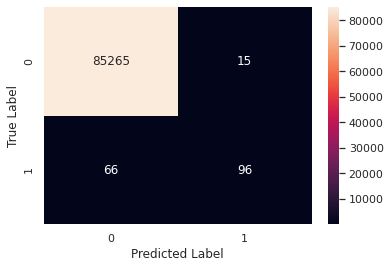

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85280
           1       0.86      0.59      0.70       162

    accuracy                           1.00     85442
   macro avg       0.93      0.80      0.85     85442
weighted avg       1.00      1.00      1.00     85442



In [80]:
# Plotting the Confusion Matrix

cm = confusion_matrix(y_val, gs_rf_predicted_labels)
cmdf = pd.DataFrame(cm, index=["0","1"],columns=["0","1"])
fig, ax = plt.subplots(1,1)
sns.heatmap(cmdf,annot=True, fmt='d', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

#Printing the Classification Report
print(classification_report(y_val, gs_rf_predicted_labels))

In [81]:
# Evaluate f1-score logistic regression model
print("Logistic regression evaluation:", f1_score(y_val, rs_lr_predicted_labels))

Logistic regression evaluation: 0.7854785478547854


In [82]:
# Evaluate f1-score random forest model
print("Random forest evaluation:", f1_score(y_val, gs_rf_predicted_labels))

Random forest evaluation: 0.7032967032967032


/home/assitan/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


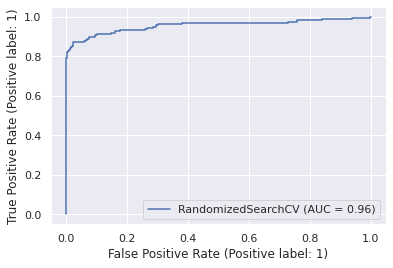

In [83]:
# AUC Score
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_lr, X_val, y_val);

/home/assitan/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


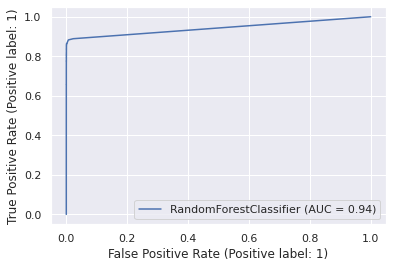

In [87]:
plot_roc_curve(rf_model, X_val, y_val);

## 7. Testing the model


In [108]:
y_pred_test = rf_model.predict(X_test)

In [109]:
# Evaluate f1-score random forest model
print("Random forest evaluation:", f1_score(y_test, y_pred_test))

Random forest evaluation: 0.8231884057971014


/home/assitan/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


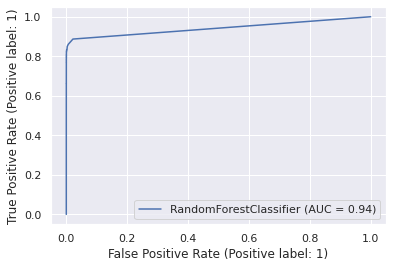

In [110]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(rf_model, X_test, y_test);

In [112]:
# make predictions on test data 
rf_predicted_test_labels = rf_model.predict_proba(X_test)[:, 1]
rf_predicted_test_labels

array([0., 0., 0., ..., 0., 0., 0.])

**Use the model**

In [113]:
credit_card = X_test.iloc[1000]
credit_card_dict = credit_card.to_dict()
credit_card_dict

{'time': 58022.0,
 'v1': -1.071075751,
 'v2': 0.74032389,
 'v3': 2.138828111,
 'v4': 0.246285129,
 'v5': 0.06198512,
 'v6': -0.371016514,
 'v7': 0.797548048,
 'v8': 0.021495732,
 'v9': -0.129206888,
 'v10': -0.886336993,
 'v11': -0.176539632,
 'v12': 0.723445645,
 'v13': 0.157480258,
 'v14': -0.282065003,
 'v15': -0.674822792,
 'v16': -0.531534111,
 'v17': 0.070645295,
 'v18': -1.153616413,
 'v19': -1.155834158,
 'v20': -0.234713579,
 'v21': -0.11976122,
 'v22': -0.23017531,
 'v23': -0.091648999,
 'v24': 0.602902637,
 'v25': 0.086165058,
 'v26': -0.71868059,
 'v27': 0.016999323,
 'v28': 0.092905471,
 'amount': 49.99}

In [114]:
rf_model.predict_proba([credit_card])[0, 1]

/home/assitan/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.0

In [115]:
y_test.iloc[1000]

0